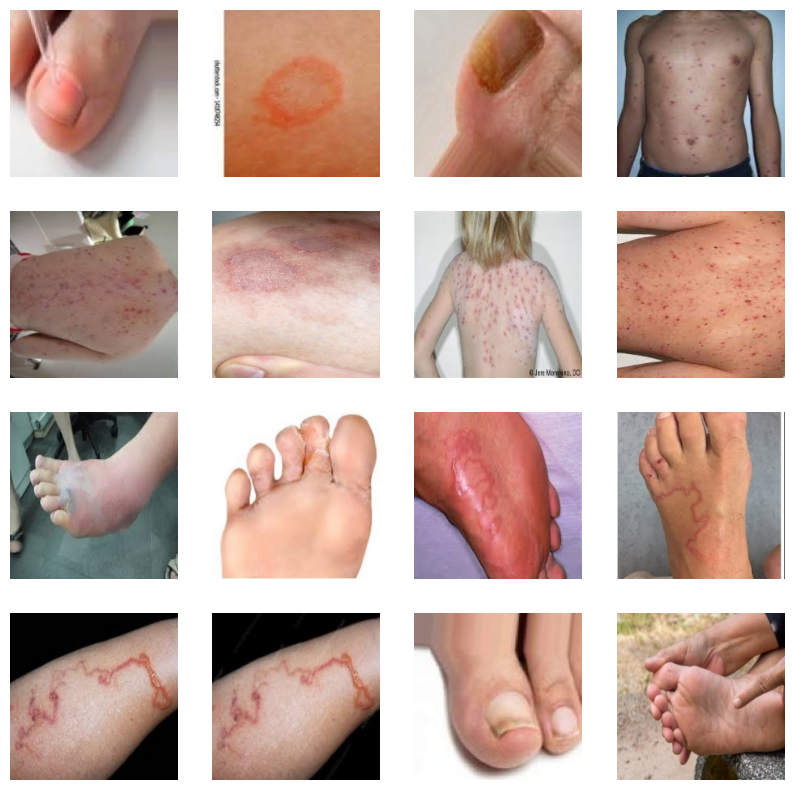

In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your test directory
vis_dir = '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths

image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()


### 2.2 Training Data Distribution

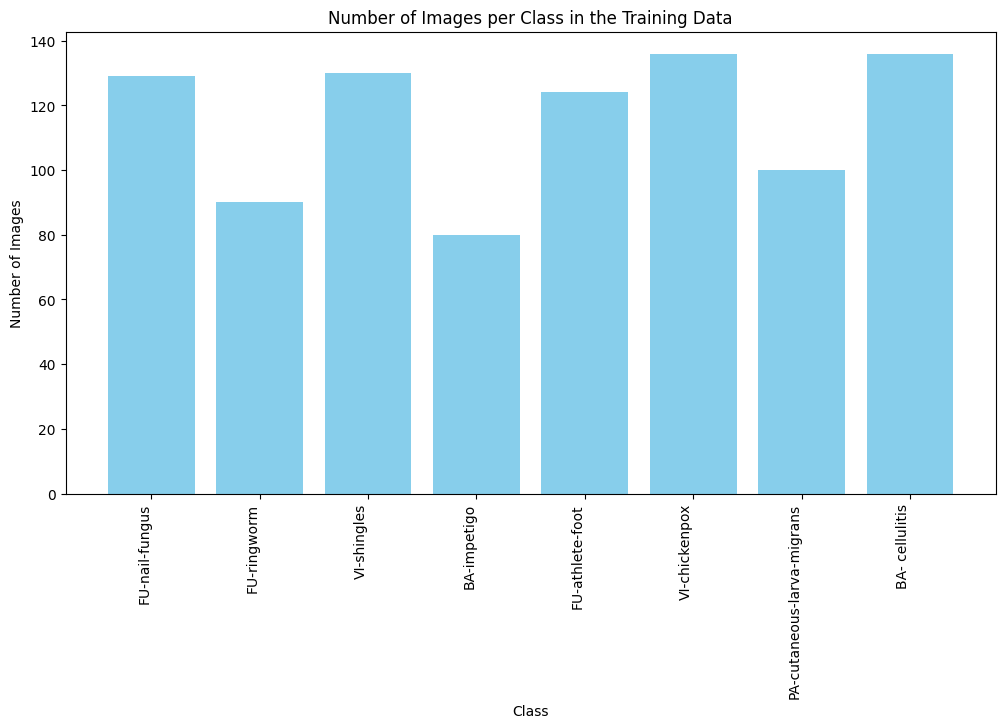

In [17]:
# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

### 2.3 Test Data Distribution

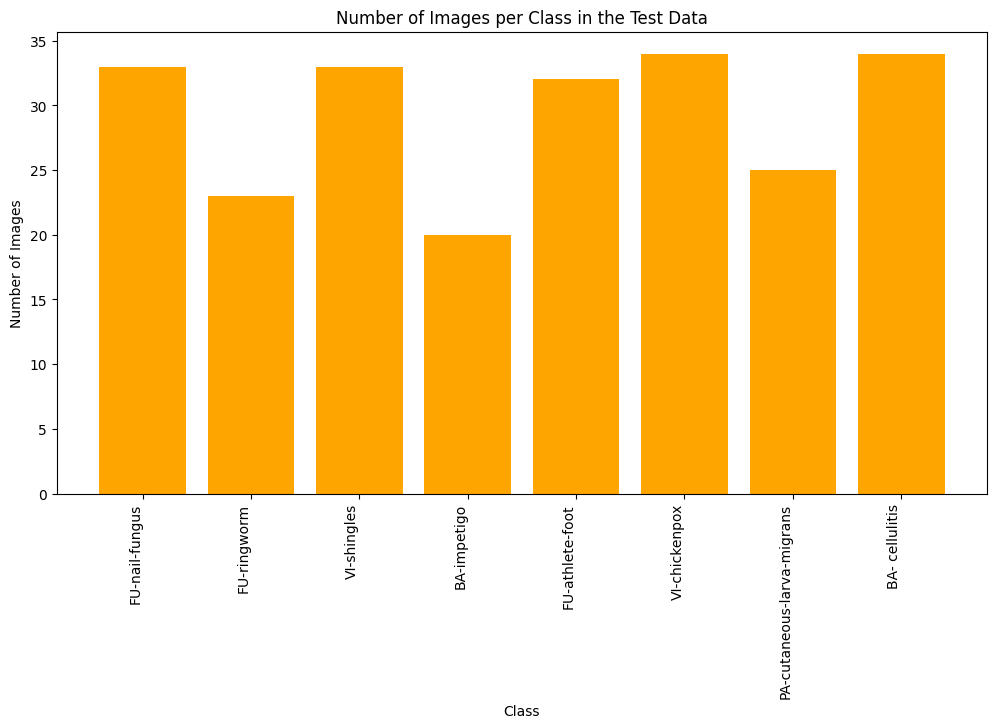

In [18]:
test_vis_dir = '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set'

# Get the list of all subdirectories (classes)
classes = os.listdir(test_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(test_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='orange')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Test Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

In [19]:
import os
from PIL import Image

# Define paths
input_dirs = {
    'train': '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set',
    'test': '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set'
}
output_dir = '/kaggle/working/'

# Create output directory and subdirectories if they don't exist
for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(224, 224)):
    try:
        with Image.open(input_path) as img:
            # Handle images with Transparency in Palette mode
            if img.mode == 'P':
                img = img.convert('RGBA')
            # Convert image to RGB if it has an alpha channel or is Palette based
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format='JPEG')
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        # Create the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        
        # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")

Resizing and saving images completed.


### 3.2 Resized Images Visualization

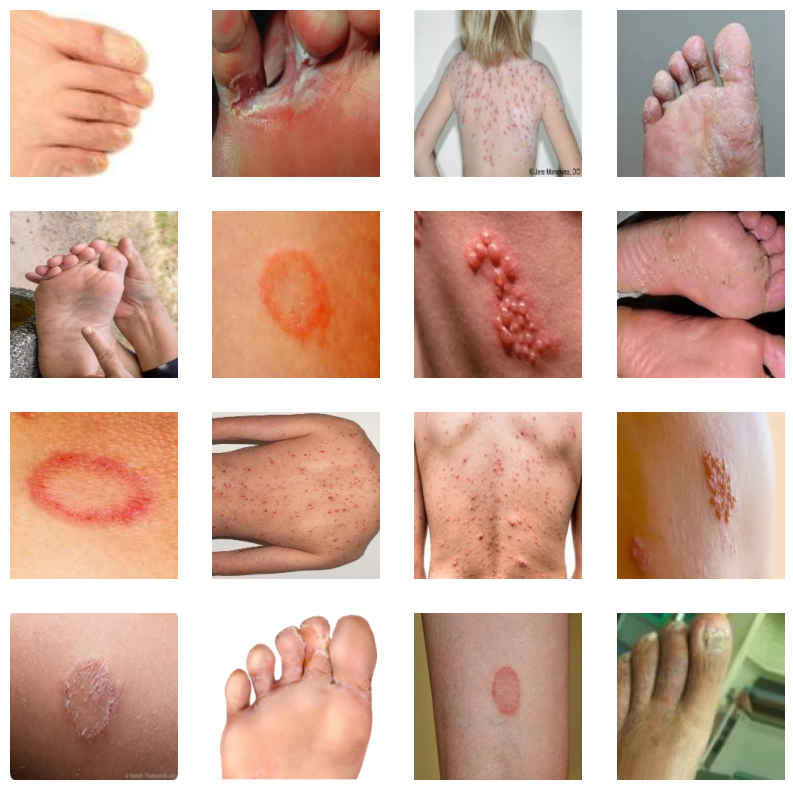

In [20]:
# Define the path to your test directory
vis_dir = '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

## 4. Data Generators

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define paths
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'

# Create an instance of the ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True,
    #fill_mode='nearest'
)
# Create an instance of the ImageDataGenerator for the test set (usually without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    seed= 777,
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=20,           # Number of images to yield per batch
    class_mode='categorical' # Since we have only 19 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    seed= 777,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 3533 images belonging to 27 classes.
Found 1128 images belonging to 27 classes.


In [22]:
train_class_names = list(train_generator.class_indices.keys())
print("Train classes:", train_class_names)

# Get class names from test generator
test_class_names = list(test_generator.class_indices.keys())
print("Test classes:", test_class_names)

Train classes: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'BA- cellulitis', 'BA-impetigo', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'PA-cutaneous-larva-migrans', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'VI-chickenpox', 'VI-shingles', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
Test classes: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant 

## 5. Battle Of 13 Model

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Here, we will test 13 pretrained models at once and choose the best-performing one. For this initial test, we will train the models for only 10 epochs.
    <br>To help the models converge faster, we initialized the weights with ImageNet weights for quicker training.
</div>

In [23]:
from tensorflow.keras.applications import Xception, ResNet50, VGG16, InceptionV3, DenseNet121
from tensorflow.keras.applications import MobileNet, MobileNetV2, NASNetMobile, EfficientNetB0, EfficientNetB3, EfficientNetB4, ResNet101, ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

def create_model(base_model_class, input_shape=(224, 224, 3)):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.8)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(8, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [24]:
# List of models to try
models = [
    ('Xception', Xception),
    ('ResNet50', ResNet50),
    ('VGG16', VGG16),
    ('InceptionV3', InceptionV3),
    ('DenseNet121', DenseNet121),
    ('MobileNet', MobileNet),
    ('MobileNetV2', MobileNetV2),
    ('NASNetMobile', NASNetMobile),
    ('EfficientNetB0', EfficientNetB0),
    ('EfficientNetB3', EfficientNetB3),
    ('EfficientNetB4', EfficientNetB4),
    ('ResNet101', ResNet101),
    ('ResNet152', ResNet152),
    #('EfficientNetB5', EfficientNetB5),
    #('EfficientNetB6', EfficientNetB6)
]


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_name = None
best_val_accuracy = 0

for model_name, model_class in models:
    print(f"Training {model_name}...")
    
    model = create_model(model_class)
    
    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        verbose=2,
        callbacks=[checkpoint]
    )

    # Evaluate the model on the validation set
    val_accuracy = max(history.history['val_accuracy'])

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_name = model_name

    print(f"{model_name} validation accuracy: {val_accuracy}")

print(f"The best performing model is {best_model_name} with a validation accuracy of {best_val_accuracy}")


Training Xception...
Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 27), output.shape=(None, 8)

## 7. Training The Winning Model

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

# Load the pre-trained DenseNet121 model with ImageNet weights, without the top (classification) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the feature maps
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.8)(x)  # Dropout for regularization
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 units
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(8, activation='sigmoid')(x)  # Final layer for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Save the model with the best validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model on the data
history = model.fit(
    train_generator,
    epochs=150,
    validation_data=test_generator,
    verbose=2,
    callbacks=[checkpoint]  # Include the callback
)

# Save training history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The model reached a validation accuracy of 88%, which is higher than the initial test result. Better results can be achieved with hyperparameter tuning.
</div>

In [ ]:
!pip install visualkeras

## 8. Model Visualization

In [ ]:
from tensorflow.keras.models import load_model
import visualkeras
from PIL import Image

# Load your pre-trained model
model_path = '/kaggle/working/best_model.keras'
model = load_model(model_path)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path = '/kaggle/working/model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## 9. Training Results

In [ ]:
import matplotlib.pyplot as plt

# Saved training history
#train_accuracy = history.history['accuracy']
#train_loss = history.history['loss']
#val_accuracy = history.history['val_accuracy']
#val_loss = history.history['val_loss']


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()
